Data mining
Trần Quang Minh - 19521856
Lab2, Exercise 2 Job market

## 1. Load the data using Pandas.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/lab2-datamining/job-market (1).csv')
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
5,37404307.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
6,37404355.0,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0.0,30.0,NaN
7,37404350.0,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0.0,30.0,NaN
8,37404301.0,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0.0,30.0,NaN
9,37404286.0,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0.0,30.0,NaN


## 2. Visualize top 10 first rows

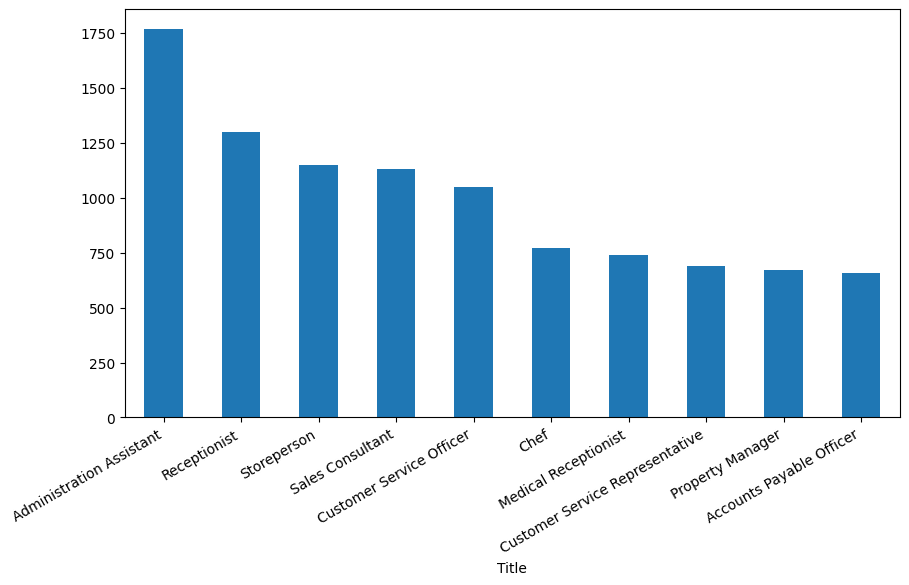

In [5]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('Title')['HighestSalary'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()

<Axes: >

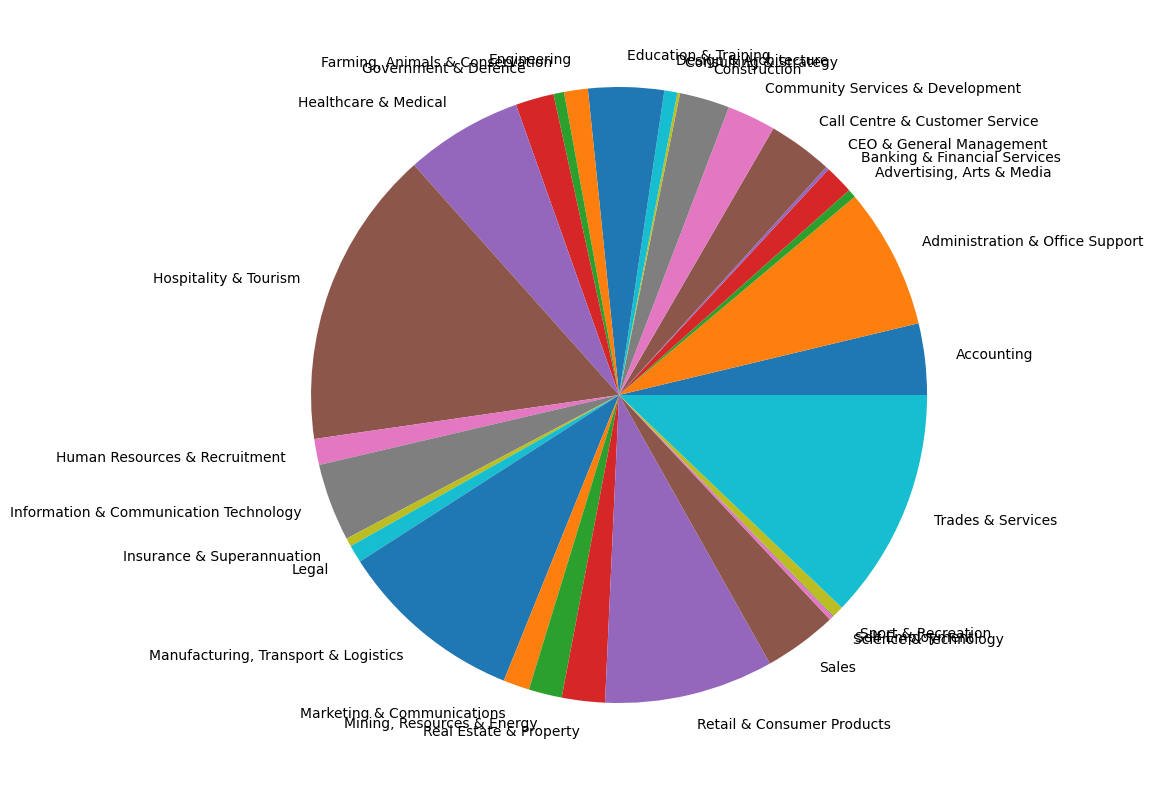

In [13]:
df.groupby('Classification').size().plot.pie(figsize = (10,10))


## Fix column datatypes.

In [14]:
df.dtypes

Id                   float64
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary         float64
HighestSalary        float64
JobType               object
dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Id                               float64
Title                             object
Company                           object
Date                 datetime64[ns, UTC]
Location                          object
Area                              object
Classification                    object
SubClassification                 object
Requirement                       object
FullDescription                   object
LowestSalary                     float64
HighestSalary                    float64
JobType                           object
dtype: object

## Check and clean the data

In [16]:
df[df.duplicated()].shape[0]

30689

In [17]:
df.isnull().sum()

Id                   30690
Title                30690
Company              31306
Date                 30690
Location             30690
Area                 34397
Classification       30690
SubClassification    30690
Requirement          30690
FullDescription      30946
LowestSalary         30690
HighestSalary        30690
JobType              30937
dtype: int64

In [18]:
df = df.drop_duplicates().dropna()

In [19]:
df[df.duplicated()].shape[0]

0

In [20]:
df.isnull().sum()

Id                   0
Title                0
Company              0
Date                 0
Location             0
Area                 0
Classification       0
SubClassification    0
Requirement          0
FullDescription      0
LowestSalary         0
HighestSalary        0
JobType              0
dtype: int64

In [21]:
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
121,37404238.0,Fabricator/Installer,WORKPLACE ACCESS & SAFETY,2018-10-07 00:00:00+00:00,Melbourne,Bayside & South Eastern Suburbs,Trades & Services,Welders & Boilermakers,Trade qualified person with skills in welding ...,<p>&nbsp;</p>\n <p><strong><em>*&nbsp; ...,0.0,30.0,Full Time
122,37404195.0,Boilermaker,RPM Contracting QLD P/l,2018-10-07 00:00:00+00:00,Brisbane,Southern Suburbs & Logan,Trades & Services,Welders & Boilermakers,Perm rate $30. Structural steel fab & weld out...,<p>One of Australia's best engineering worksho...,0.0,30.0,Full Time
125,37404288.0,Casual Childcare Positions | Bondi Junction,anzuk Education,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Education & Training,Teaching - Early Childhood,"anzuk education are searching for reliable, en...","<p style=""text-align:center;""><strong>What is ...",0.0,30.0,Contract/Temp
126,37404267.0,Technician,Zoom Recruitment & Training,2018-10-07 00:00:00+00:00,Sydney,South West & M5 Corridor,Engineering,Mechanical Engineering,"This Australian Icon, connects the people of t...","<p>This Australian Icon, connects the people o...",0.0,30.0,Full Time
127,37404230.0,Systems Engineer,Humanised Group,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,Systems Engineer to work on BAU/Projects for a...,<strong>The Company</strong><br> <br> This org...,0.0,30.0,Full Time
129,37404237.0,SENIOR MARKETING & PRODUCT MANAGER,Credit Repair Australia Pty Ltd,2018-10-07 00:00:00+00:00,Sydney,South West & M5 Corridor,Marketing & Communications,Product Management & Development,Seeking a forward thinker who is looking for a...,<p><strong>About us </strong></p>\n <p>...,0.0,30.0,Full Time
130,37404370.0,Operations Delivery Manager,Woolworths Group,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Programme & Project Management,Ready for a challenge? Opportunity to be a par...,<p> </p>\n <div></div>\n <div></...,0.0,30.0,Full Time
131,37404228.0,General Manager,Multiple Sclerosis SA and NT Inc,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",CEO & General Management,General/Business Unit Manager,3-year contract Based in Adelaide Key leadersh...,<p><strong>About us&nbsp;</strong></p>\n ...,0.0,30.0,Full Time
132,37404226.0,General Manager,Multiple Sclerosis SA and NT Inc,2018-10-07 00:00:00+00:00,Melbourne,CBD & Inner Suburbs,CEO & General Management,General/Business Unit Manager,3-year contract Based in Adelaide Key leader...,<p><strong>About us&nbsp;</strong></p>\n ...,0.0,30.0,Full Time
133,37404174.0,Technical Support Executive - $70K + Super - C...,Command Group,2018-10-07 00:00:00+00:00,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Help Desk & IT Support,Do you have strong technical support skills? L...,<div>\n <ul>\n <li>Great s...,0.0,30.0,Full Time


In [22]:
df.describe()

,Id,LowestSalary,HighestSalary
count,5.898000e+03,5898.000000,5898.000000
mean,3.739050e+07,24.560868,42.390641
std,2.780707e+04,20.621646,11.656813
min,3.679829e+07,0.000000,30.000000
25%,3.738720e+07,0.000000,30.000000
50%,3.739687e+07,30.000000,40.000000
75%,3.740149e+07,40.000000,50.000000
max,3.740440e+07,50.000000,60.000000
